## Ração

Queremos saber quais as quantidades ideais de cada ingrediente para fazer uma quantidade de ração, com as necessidades nutricionais atendidas e o custo total dos ingredientes seja o menor possível.

Temos os ingredientes e seus custos: 
* Milho (A1) - Reais 65,00 /Kg 
* Farinha de ossos (A2) - Reais 30,00 /Kg

Para fazer uma certa quantidade de ração para, digamos, aves, é necessário uma certa quantidade de nutrientes, digamos, vitamina A (Va), vitamina B (Vb) e proteína (Vc ). 

Os ingredientes apresentam esses nutrientes determinadas unidades (un): 
* A1 - 2 un. de Va, 3 un. de Vb e 1 un. de Vc ; 
* A2 - 3 un. de Va, 2 un. de Vb;

Deseja-se preparar uma ração que contenha no mínimo 7 unidades de Va, 9 unidades de Vb e 1 unidade de Vc. 

Determinar a quantidade dos alimentos necessários para satisfazer as necessidades da ração.

x_1: quantidade de ingrediente do tipo A_1 presente na mistura

x_2: quantidade de ingrediente do tipo A_2 presente na mistura

min 65 * x_1 + 30 * x_2

sujeito a:

2 * x_1 + 3 * x_2 >= 7

3 * x_1 + 2 * x_2 >= 9

x_1 >= 1

x_1, x_2 >= 0

x_1, x_2 ∈ R

In [1]:
from docplex.mp.model import Model
import cplex

m = Model(name='Ração')
x_1 = m.integer_var(name='x_1')
x_2 = m.integer_var(name='x_2')

m.add_constraint(2*x_1 + 3*x_2 >= 7)
m.add_constraint(3*x_1 + 2*x_2 >= 9)
m.add_constraint(x_1 >= 1)

m.add_constraint(x_1 >= 0)
m.add_constraint(x_2 >= 0)

m.minimize(65*x_1 + 30*x_2)
m.solve()
print(m.solution)

solution for: Ração
objective: 155
x_1=1
x_2=3



### Usando o método de força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

In [2]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Forma padrão:**

x_1: quantidade de ingrediente do tipo A_1 presente na mistura

x_2: quantidade de ingrediente do tipo A_2 presente na mistura

min 65 * x_1 + 30 * x_2

sujeito a:

2 * x_1 + 3 * x_2 - x_3 >= 7

3 * x_1 + 2 * x_2 - x_4 >= 9

x_1 - x_5 >= 1

x_1, x_2, x_3, x_4, x_5 >= 0

x_1, x_2, x_3, x_4, x_5 ∈ R

In [3]:
# Informar aqui os valores da matriz A
A = np.array([[2, 3, -1, 0, 0],
              [3, 2, 0, -1, 0],
              [1, 0, 0, 0, -1]])

In [4]:
# Informar aqui os valores da matriz b
b = np.array([[7], 
              [9], 
              [1]])

In [5]:
# Informar aqui os valores do vetor c
c = np.array([65, 30, 0, 0, 0])

In [6]:
m = len(A)
print('m:', m)

n = len(A[0])
print('n:', n)

combinacoes = factorial(n)/(factorial(m)*(factorial(n-m)))

print('O número máximo de soluções básicas:', combinacoes)

m: 3
n: 5
O número máximo de soluções básicas: 10.0


In [7]:
def verifica_solucao_viavel(x):
    '''
        Função que verifica se a solução é viável
        
        >>> verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
            Esta é uma solução básica viável
            True
        >> verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
            Esta NÃO é uma solução básica viável
            False
        >> verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
            Esta é uma solução básica viável
            True
    '''
    
    xB_bool = []

    for w in range(0, len(x)):
        if(x[w] >= 0):
            xB_bool.append(True)           
        else:
            xB_bool.append(False)

        try:
            if(x[w][0] >= 0):
                xB_bool.append(True)
            else:
                xB_bool.append(False)
        except:
            pass
            
    if(all(xB_bool)):
        print('Esta é uma solução básica viável')
        return True
    else:
        print('Esta NÃO é uma solução básica viável')
        return False

In [8]:
solucoes_viaveis = np.array([[0, 0, 0], 0, 0, 0])
todas_solucoes = np.array([[0, 0, 0], 0, 0, 0])
cont_x = 0

for w in range(0, n):
    for y in range(w+1, n):
        for z in range(y+1, n):
            
            # Id da solução
            cont_x = cont_x + 1;
            print('\nx', cont_x)
            
            # Conjunto de índices IB
            IB = [w,y,z]
            print('IB =', IB[0]+1, IB[1]+1, IB[2]+1)
            
            # B
            B = np.array([A[0][w], A[0][y], A[0][z]])
            for v in range (1, m):
                B = np.row_stack(tup=(B, [A[v][w], A[v][y], A[v][z]]))
            print('B =', B, '\n')
            
            # Verificando se B é uma base
            v, V =  np.linalg.eig(B)
            print('v:', v)
            if(v.all() == 0):
                
                print('A matriz B não é uma base')
                print('A linha LD é:')
                print (B[v == 0,:])
                print('\n---------------------------------------------------------------------------\n')
                
                # Colocar na tabela de soluções básicas, com informações vazias
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                continue

            # B-1
            try:
                B1 = np.linalg.inv(B)
                print('B-1 =', B1, '\n')
            except:
                print("B-1 não existe")
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                print('\n---------------------------------------------------------------------------\n')
                continue

            # xB
            xB = B1.dot(b)
            print('xB =', xB, '\n')
            
            # x
            x = []
            for v in range (0, n):              
                if(v == IB[0]):
                    x.append(np.round(xB[0]))
                elif(v == IB[1]):
                    x.append(np.round(xB[1]))
                elif(v == IB[2]):
                    x.append(np.round(xB[2]))
                else:
                    x.append(0)
            print('x =', x, '\n')
                
            # cTx
            cTx = np.transpose(c).dot(x)
            print('cTx =', cTx, '\n')
                
            # Colocar na tabela de soluções básicas
            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, cTx, x]))
            
            # Se a solução for viável, colocar na tabela de soluções viáveis
            if(verifica_solucao_viavel(x) == True):
                solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, cTx, x]))
            
            print('\n---------------------------------------------------------------------------\n')



x 1
IB = 1 2 3
B = [[ 2  3 -1]
 [ 3  2  0]
 [ 1  0  0]] 

v: [ 4.89968779+0.j         -0.44984389+0.45368463j -0.44984389-0.45368463j]
B-1 = [[ 0.   0.   1. ]
 [ 0.   0.5 -1.5]
 [-1.   1.5 -2.5]] 

xB = [[1.]
 [3.]
 [4.]] 

x = [array([1.]), array([3.]), array([4.]), 0, 0] 

cTx = [155.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 2 4
B = [[ 2  3  0]
 [ 3  2 -1]
 [ 1  0  0]] 

v: [ 4.89607745 -1.34996672  0.45388927]
B-1 = [[ 0.          0.          1.        ]
 [ 0.33333333  0.         -0.66666667]
 [ 0.66666667 -1.          1.66666667]] 

xB = [[ 1.        ]
 [ 1.66666667]
 [-2.66666667]] 

x = [array([1.]), array([2.]), 0, array([-3.]), 0] 

cTx = [125.] 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 2 5
B = [[ 2  3  0]
 [ 3  2  0]
 [ 1  0 -1]] 

v: [-1.  5. -1.]
B-1 = [[-0.4  0.6  0. ]
 [ 0.6 -0.4  0. ]
 [-0.4  0.6 -1. ]

<ipython-input-8-a8af49b575b4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  solucoes_viaveis = np.array([[0, 0, 0], 0, 0, 0])
<ipython-input-8-a8af49b575b4>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  todas_solucoes = np.array([[0, 0, 0], 0, 0, 0])
<ipython-input-8-a8af49b575b4>:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarra

In [9]:
## Formatando os valores do todas_solucoes para sair bonitinho na tabela

for x in range(1, len(todas_solucoes)):
    try:
        todas_solucoes[x][2] = todas_solucoes[x][2][0]
    except:
        pass

for x in range(1, len(todas_solucoes)):
    for y in range(0, len(todas_solucoes)):
        try:
            todas_solucoes[x][3][y] = todas_solucoes[x][3][y][0]
        except:
            pass

todas_solucoes

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2, 3], 1, 155.0, [1.0, 3.0, 4.0, 0, 0]],
       [[1, 2, 4], 2, 125.0, [1.0, 2.0, 0, -3.0, 0]],
       [[1, 2, 5], 3, 225.0, [3.0, 1.0, 0, 0, 2.0]],
       [[1, 3, 4], 4, 65.0, [1.0, 0, -5.0, -6.0, 0]],
       [[1, 3, 5], 5, 195.0, [3.0, 0, -1.0, 0, 2.0]],
       [[1, 4, 5], 6, 260.0, [4.0, 0, 0, 2.0, 2.0]],
       [[2, 3, 4], 7, [], []],
       [[2, 3, 5], 8, 120.0, [0, 4.0, 6.0, 0, -1.0]],
       [[2, 4, 5], 9, 60.0, [0, 2.0, 0, -4.0, -1.0]],
       [[3, 4, 5], 10, 0.0, [0, 0, -7.0, -9.0, -1.0]]], dtype=object)

In [10]:
print("Todas as soluções:")

todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
todas_solucoes.sort_values(by=['Id da solução'])

todas_solucoes

Todas as soluções:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,155.0,"[1.0, 3.0, 4.0, 0, 0]"
1,"[1, 2, 4]",2,125.0,"[1.0, 2.0, 0, -3.0, 0]"
2,"[1, 2, 5]",3,225.0,"[3.0, 1.0, 0, 0, 2.0]"
3,"[1, 3, 4]",4,65.0,"[1.0, 0, -5.0, -6.0, 0]"
4,"[1, 3, 5]",5,195.0,"[3.0, 0, -1.0, 0, 2.0]"
5,"[1, 4, 5]",6,260.0,"[4.0, 0, 0, 2.0, 2.0]"
6,"[2, 3, 4]",7,[],[]
7,"[2, 3, 5]",8,120.0,"[0, 4.0, 6.0, 0, -1.0]"
8,"[2, 4, 5]",9,60.0,"[0, 2.0, 0, -4.0, -1.0]"
9,"[3, 4, 5]",10,0.0,"[0, 0, -7.0, -9.0, -1.0]"


In [11]:
qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)

print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)


Quantidade de soluções básicas:  9


<ipython-input-11-243826ed9650>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)


In [12]:
## Formatando os valores do solucoes_viaveis para sair bonitinho na tabela

for x in range(1, len(solucoes_viaveis)):
    try:
        solucoes_viaveis[x][2] = solucoes_viaveis[x][2][0]
    except:
        pass

for x in range(1, len(solucoes_viaveis)):
    for y in range(0, len(solucoes_viaveis)):
        try:
            solucoes_viaveis[x][3][y] = solucoes_viaveis[x][3][y][0]
        except:
            pass

solucoes_viaveis

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2, 3], 1, 155.0, [1.0, 3.0, 4.0, 0, 0]],
       [[1, 2, 5], 3, 225.0, [3.0, 1.0, 0, 0, 2.0]],
       [[1, 4, 5], 6, 260.0, [4.0, 0, 0, 2.0, 2.0]]], dtype=object)

In [13]:
print("Soluções viáveis:")

solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
solucoes_viaveis.sort_values(by=['Id da solução'])

solucoes_viaveis

Soluções viáveis:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,155.0,"[1.0, 3.0, 4.0, 0, 0]"
1,"[1, 2, 5]",3,225.0,"[3.0, 1.0, 0, 0, 2.0]"
2,"[1, 4, 5]",6,260.0,"[4.0, 0, 0, 2.0, 2.0]"


In [14]:
qtd_solucoes_viaveis = len(solucoes_viaveis)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)


Quantidade de soluções viáveis:  3


In [15]:
## Digite 1 se você deseja maximizar ou 2 se você deseja minimizar
entrada = 2

if(entrada == 1):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmax()
elif(entrada == 2):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmin()
    
solucao_otima = solucoes_viaveis['cTx'][id_solucao_otima]

print('Solução Ótima:', solucao_otima)


Solução Ótima: 155.0


In [16]:
print('\nSoluções que geram a solução ótima:\n')

geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]

geram_solucoes_otimas


Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,155.0,"[1.0, 3.0, 4.0, 0, 0]"


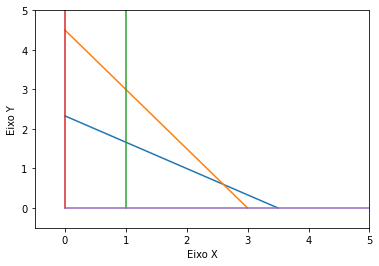

In [17]:
plt.plot([0, 3.5], [2.33, 0]) # 2*x_1 + 3*x_2 >= 7
plt.plot([0, 3], [4.5, 0]) # 3*x_1 + 2*x_2 >= 9
plt.plot([1, 1], [0, 6]) # x_1 >= 1

plt.plot([0, 0], [0, 8]) # x2 >= 0
plt.plot([0, 8], [0, 0]) # x1 >= 0

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.axis([-0.5, 5, -0.5, 5]) # [xmin, xmax, ymin, ymax]

plt.show()

In [18]:
pontos_extremos = 4

print('\nO número máximo de soluções básicas:', combinacoes)
print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)
print('\nPontos Extremos:', pontos_extremos)
print('\nSolução Ótima:', solucao_otima)


O número máximo de soluções básicas: 10.0

Quantidade de soluções básicas:  9

Quantidade de soluções viáveis:  3

Pontos Extremos: 4

Solução Ótima: 155.0
